# Investigating Movies dataset 

In [ ]:
#importing liberaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Wrangling

In [3]:
df = pd.read_csv('tmdb-movies.csv') #reading the data

In [4]:
df.shape #finding out the number of movies

(10866, 21)

In [6]:
df.head(1) # genral look at the data

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [9]:
df.isna().any() #looking for missing values

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

The dataset does have some missing values

In [10]:
df.describe() #general look at the statistics of the data

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Data Cleaning

In [16]:
# cleaning the data
df.dropna(inplace = True) #removing missing values
df.drop_duplicates(inplace = True) #removing duplicated values

In [21]:
#dropping not needed columns
df.drop(labels = ['id','imdb_id','homepage','tagline','overview'],axis = 1 ,inplace = True)

## Exploration of the data

In [25]:
# highest revenue movies
mean_rev = df.revenue.mean() #getting the mean value of the revenues
highest_rev_movies= df[df['revenue']> mean_rev].sort_values(by = ['revenue'], ascending = False) #getting the values higher than the mean
highest_rev_movies

### What is the most popular genre type ?

In [ ]:
# finding the most popular genre types
df.genres.value_counts()

Drama is the most popular genre type

### What are the top 5 popular movies in the 20th century ?

In [113]:
# top 5 popular movies in 20th century
pop_20th  = df.query('release_year > 2000') # getting movies that were released after 2000
pop_20th_sorted = pop_20th.sort_values(by = ['popularity'],ascending = False) #sorting the movies by popularity
pop_20th_sorted.head(5)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
629,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,saving the world|artificial intelligence|fathe...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08
630,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,marvel comic|spaceship|space|scene during end ...,121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/14,5612,7.9,2014,1.565855e+08,7.122911e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### What is the most popular movie for the director who produced the movie with the highest revenue?

In [112]:
# most popular movie for the director with highest revenue
highest_revenue = df[df['revenue'] == df.revenue.max()] # getting the movies with the highest revenue
richest_director = highest_revenue.director.tolist()[0] # getting the name of the director of that movies
movies = df[df['director'] == richest_director] # getting the movies of that director
movie = df.query('popularity == @movies.popularity.max()').original_title.tolist()[0] #getting the most popular movie for that director
print('{} is the most popular movie produced by {}'.format(movie,richest_director))

Avatar is the most popular movie produced by James Cameron


### What are the top 5 movies that made no profit?

In [116]:
# finding movies which didn't make money
no_zero_budget_df = df.query('budget !=0' and 'revenue != 0') # not including missing values from budget and revenue
no_zero_budget_df['profit'] = no_zero_budget_df['revenue']- no_zero_budget_df['budget'] #calculating profit
no_zero_budget_df.sort_values(by = ["profit"], inplace = True) # sorint by profit
no_profit = no_zero_budget_df.query('profit < 0') #getting negative values
big_profit = no_zero_budget_df.query('profit > 0') #getting positive values
no_profit.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
2244,0.250540,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,assassin|small town|revenge|deception|super speed,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,6.4,2010,4.250000e+08,1.108757e+07,-413912431
5508,1.214510,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,texas|horse|survivor|texas ranger|partner,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,7/3/13,1607,6.0,2013,2.386885e+08,8.357833e+07,-165710090
3484,0.921653,150000000,38992758,Mars Needs Moms,Seth Green|Joan Cusack|Dan Fogler|Breckin Meye...,Simon Wells,boy|alien|rescue|martian|alien abduction,88,Adventure|Animation|Family,Walt Disney Animation Studios,3/9/11,129,5.5,2011,1.454097e+08,3.779950e+07,-111007242
6590,1.390297,149000000,64459316,Flushed Away,Hugh Jackman|Kate Winslet|Ian McKellen|Jean Re...,David Bowers|Sam Fell,london|underworld|return|ship|frog,85,Adventure|Animation|Comedy|Family,Aardman Animations|DreamWorks Animation,10/22/06,488,6.0,2006,1.611687e+08,6.972365e+07,-84540684
6309,0.626900,80000000,5989640,A Sound of Thunder,Heike Makatsch|Armin Rohde|David Oyelowo|Wilfr...,Peter Hyams,dying and death|time travel|romance|dinosaur,110,Thriller|Science Fiction|Adventure|Action,Epsilon Motion Pictures|Franchise Pictures|Bal...,5/15/05,58,4.8,2005,8.932506e+07,6.687812e+06,-74010360


## Graphical representation of the data

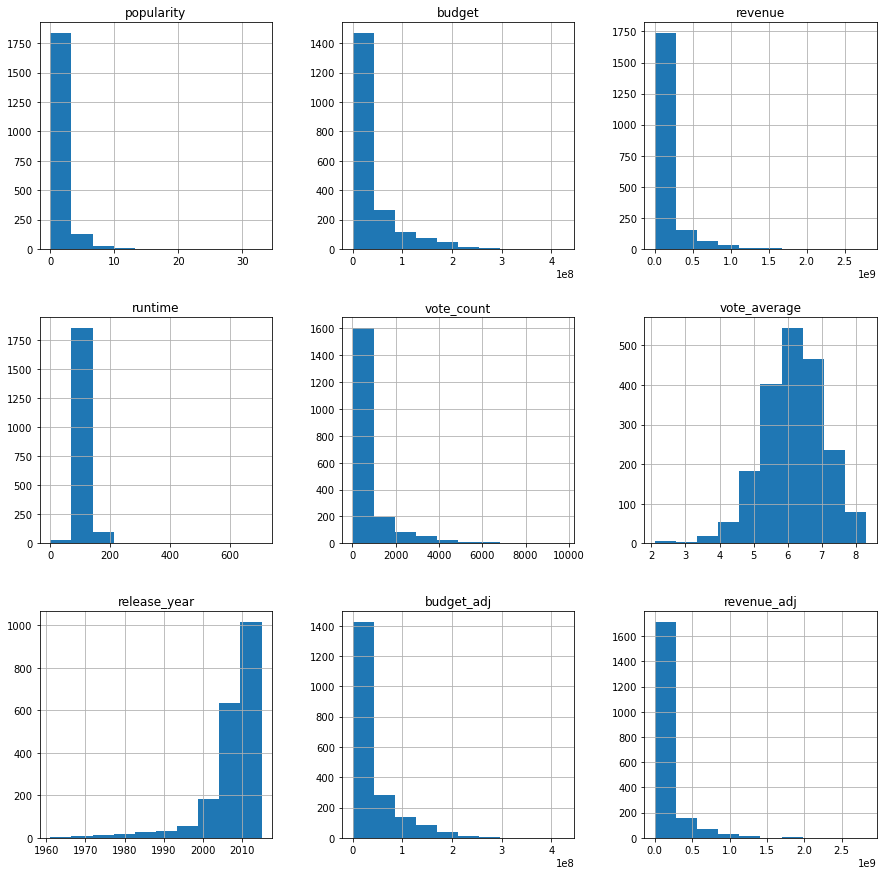

In [63]:
# general look at the graphs of the data
df.hist(figsize = (15,15));

As we can see, It is clear that the production of movies increased dramatically in the last two decades and about 90% of the movies fall between the runtime of about 90 and 150 minutes

## Comparison between successful movies and unsuccessful ones

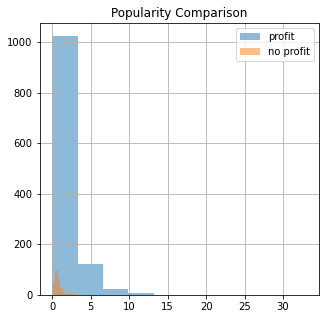

In [106]:
# Comparing the popularity of the movies
plt.figure(figsize = (5,5));
big_profit.popularity.hist(alpha =0.5 ,label ="profit");
no_profit.popularity.hist(alpha = 0.5,label= 'no profit');
plt.title('Popularity Comparison');
plt.legend();

By taking a look at the gragh here, we start to realize how differecnt successful movies(A) were, compared to their counter ones(B):
The popularity of (A) ranges from 1 to 14 with a significant amount of them ranging from 4 to 7, meanwhile (B) ranges from 0 to 3 with the majority of them below 1.


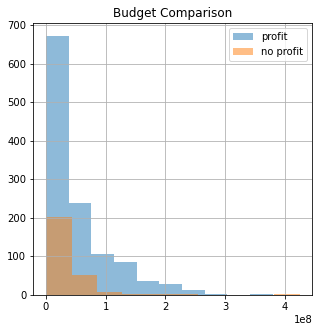

In [107]:
# Comparing the budget of the movies
plt.figure(figsize = (5,5));
big_profit.budget.hist(alpha =0.5 ,label ="profit");
no_profit.budget.hist(alpha = 0.5,label= 'no profit');
plt.title('Budget Comparison');
plt.legend();

We can see that generally speaking successful movies tend to have higher budgets.

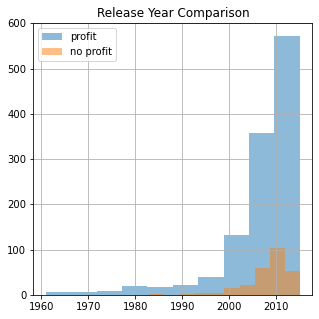

In [108]:
# Comparing the year the movie was released
plt.figure(figsize = (5,5));
big_profit.release_year.hist(alpha =0.5 ,label ="profit");
no_profit.release_year.hist(alpha = 0.5,label= 'no profit');
plt.title('Release Year Comparison');
plt.legend();

We can conclude that movies released in the last century have higher chances of being successful than movies of the current century

110.59864521591871 105.29056603773584


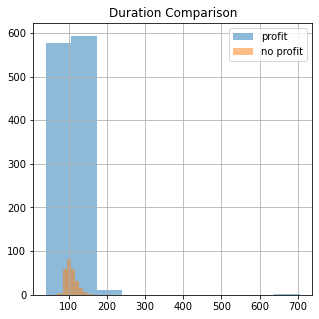

In [109]:
# Comparing runtime 
plt.figure(figsize = (5,5));
big_profit.runtime.hist(alpha =0.5 ,label ="profit");
no_profit.runtime.hist(alpha = 0.5,label= 'no profit');
plt.title('Duration Comparison');
plt.legend();
print(big_profit.runtime.mean(),no_profit.runtime.mean())


Apparently, the duration of the movie doesn't play a major role in determining the success of it

### Limitations
No exploration done on cast and keywords
## Conclusions

> We can see that there has been an increase in the productin of movies in recent years.
> Unlike movies from this century, the majory of the movies from last century were successful.
> A good marketing of the movie plays a huge role in the success of the movie (according to the popularity of the movies).
> The most popular movie of all time is Jurrassic world.
> Movies with the genre of drama have a high share of the genres of all movies.
> James Cameron is the director of the movie with the highest revenue.

